In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle


In [3]:
data =pd.read_csv("Churn_Modelling.csv")
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
label_encoder_gender = LabelEncoder()
data['Gender']= label_encoder_gender.fit_transform(data['Gender'])
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1


In [6]:
## one hot encode 'gegraphy 
from sklearn.preprocessing import OneHotEncoder
onehot_encod = OneHotEncoder()
geo_encoder = onehot_encod.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [7]:
onehot_encod.get_feature_names_out(['Geography']) 

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
geo_encoder_data = pd.DataFrame(geo_encoder.toarray(),columns=onehot_encod.get_feature_names_out(['Geography']))
geo_encoder_data 

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
## combining all with orginal data
data = pd.concat([data.drop('Geography', axis=1,errors='ignore'), geo_encoder_data], axis=1)
data.head(7)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0


In [10]:

##SAVE THE ENCODER AND SCALER
with open('label_encoder_gender.pk1','wb') as file:
    pickle.dump(label_encoder_gender,file)


with open('onehot_encod.pk1','wb') as file:
    pickle.dump(onehot_encod,file)


In [11]:
## Divide the data independent and dependent features
X = data.drop('Exited',axis=1)
y = data['Exited']


In [12]:
## split the data in train and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:

## scale the futures
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train


array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [14]:
##SAVE THE ENCODER AND SCALER
with open('label_encoder_gender.pk1','wb') as file:
    pickle.dump(label_encoder_gender,file)


with open('onehot_encod.pk1','wb') as file:
    pickle.dump(onehot_encod,file)

In [15]:
## Divide the data indepented snd dependent features
X = data.drop('Exited',axis=1)
y = data['Exited']

## split the data in traing and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## scale the futures
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train




array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [16]:
with open('scaler.pk1','wb') as file:
    pickle.dump(scaler,file)

ANN Implimentation

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense      
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard 
import datetime

2025-04-24 22:16:13.165027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
## build our ANN Model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

/Users/admin/.pyenv/versions/3.10.13/envs/tf-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss


<LossFunctionWrapper(<function binary_crossentropy at 0x144bbc310>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [21]:
## compile the modal
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=[ 'accuracy'])

In [22]:
## set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
log_dir ="logs/fit"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir = log_dir,histogram_freq=1)

In [23]:
## early stopping set up
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [26]:
## traing a model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3464 - val_accuracy: 0.8605 - val_loss: 0.3422
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8598 - loss: 0.3499 - val_accuracy: 0.8565 - val_loss: 0.3422
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.3360 - val_accuracy: 0.8630 - val_loss: 0.3315
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8710 - loss: 0.3190 - val_accuracy: 0.8660 - val_loss: 0.3428
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3325 - val_accuracy: 0.8645 - val_loss: 0.3388
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8673 - loss: 0.3294 - val_accuracy: 0.8605 - val_loss: 0.3427
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3345 - val_accuracy: 0.8630 - val_loss: 0.3496
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3301 - val_accu

In [27]:
model.save('model.h5')

In [ ]:
## loadin g tesorboard extenstion
%load_ext tensorboard               


In [ ]:
%tensorboard --logdir logs/fit20250418-002003

Reusing TensorBoard on port 6007 (pid 38131), started 0:00:16 ago. (Use '!kill 38131' to kill it.)

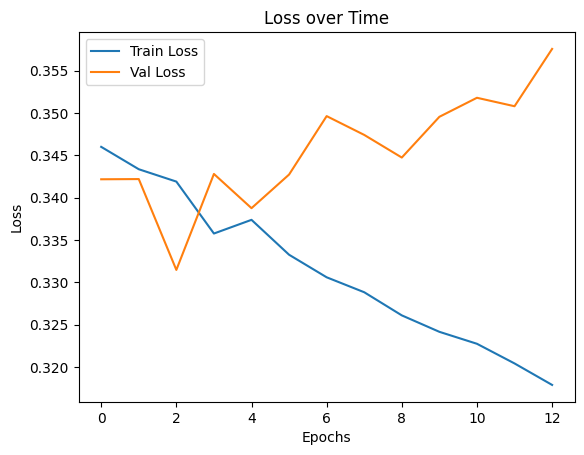

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()      